In [1]:
import torch
import joblib
import pickle
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm, complete_confusion_matrix_robust, evaluation_robustness, complete_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])
model_results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
X_test_101 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_101.csv"))
y_test_101 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_101.csv"))

X_test_102 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_102.csv"))
y_test_102 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_102.csv"))

X_test_103 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_103.csv"))
y_test_103 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_103.csv"))

X_test_104 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_104.csv"))
y_test_104 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_104.csv"))

X_test_105 = rm(pd.read_csv(path_csv + "ontime_reporting_X_test_105.csv"))
y_test_105 = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test_105.csv"))

X_tests = [X_test_101, X_test_102, X_test_103, X_test_104, X_test_105]
y_tests = [y_test_101, y_test_102, y_test_103, y_test_104, y_test_105]

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%
Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned RUS model

In [ ]:
logreg_tuned_rus = joblib.load(path_model + "logreg_tuned_RUS.joblib")
cm_robust_logreg = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = logreg_tuned_rus.predict(X_t)
    y_pred_prob = logreg_tuned_rus.predict_proba(X_t)[:, 1]
    cm_robust_logreg += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, logreg_tuned_rus, y_pred, y_pred_prob, model_results)

cm_robust_logreg //= 5

In [14]:
logreg_tuned_rus = joblib.load(path_model + "logreg_tuned_RUS.joblib")
y_pred_logreg_tuned_rus = logreg_tuned_rus.predict(X_test_101)
y_pred_prob_logreg_tuned_rus = logreg_tuned_rus.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AUROC Score:  0.74
Balanced Accuracy Score:  0.683
F1 Score:  0.481
Recall Score:  0.499
Precision Score:  0.465


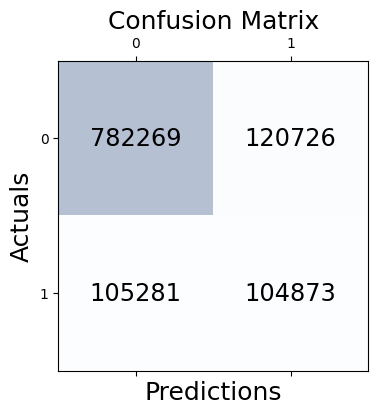

In [15]:
evaluation(y_test_101, y_pred_logreg_tuned_rus, logreg_tuned_rus, y_pred_prob_logreg_tuned_rus, results)

## Evaluate XGBoost tuned RUS model

In [ ]:
xgb_class_tuned_rus = joblib.load(path_model + "XGBoost_tuned_RUS.joblib")
cm_robust_xgb = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = xgb_class_tuned_rus.predict(X_t)
    y_pred_prob = xgb_class_tuned_rus.predict_proba(X_t)[:, 1]
    cm_robust_xgb += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, xgb_class_tuned_rus, y_pred, y_pred_prob, model_results)

cm_robust_xgb //= 5

In [12]:
xgb_class_tuned_rus = joblib.load(path_model + "XGBoost_tuned_RUS.joblib")
y_pred_xgb_tuned_rus = xgb_class_tuned_rus.predict(X_test_101)
y_pred_prob_xgb_tuned_rus = xgb_class_tuned_rus.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [18:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


AUROC Score:  0.817
Balanced Accuracy Score:  0.746
F1 Score:  0.547
Recall Score:  0.679
Precision Score:  0.458


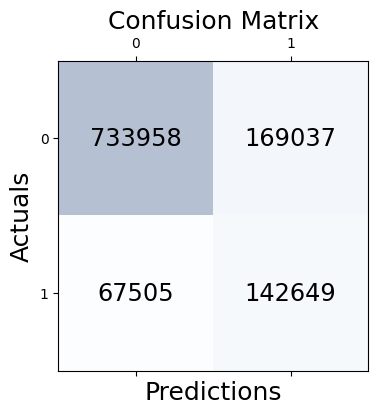

In [13]:
evaluation(y_test_101, y_pred_xgb_tuned_rus, xgb_class_tuned_rus, y_pred_prob_xgb_tuned_rus, results)

## Evaluate TabNet tuned RUS model

In [ ]:
tabnet_tuned_rus = torch.load(path_model + "TabNet_tuned_RUS.pt", map_location=torch.device('cpu'))
tabnet_tuned_rus.device = "cpu"
cm_robust_tabnet = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = tabnet_tuned_rus.predict(X_t.values)
    y_pred_prob = tabnet_tuned_rus.predict_proba(X_t.values)[:, 1]
    cm_robust_tabnet += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, tabnet_tuned_rus, y_pred, y_pred_prob, model_results)

cm_robust_tabnet //= 5

In [10]:
tabnet_tuned_rus = torch.load(path_model + "TabNet_tuned_RUS.pt", map_location=torch.device('cpu'))
tabnet_tuned_rus.device = "cpu"
y_pred_tabnet_tuned_rus = tabnet_tuned_rus.predict(X_test_101.values)
y_pred_prob_tabnet_tuned_rus = tabnet_tuned_rus.predict_proba(X_test_101.values)[:, 1]

AUROC Score:  0.746
Balanced Accuracy Score:  0.68
F1 Score:  0.449
Recall Score:  0.653
Precision Score:  0.342


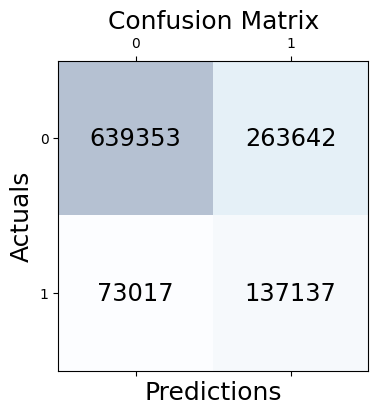

In [11]:
evaluation(y_test_101, y_pred_tabnet_tuned_rus, tabnet_tuned_rus, y_pred_prob_tabnet_tuned_rus, results)

## Evaluate Random Forests tuned RUS model

In [ ]:
rf_tuned_rus = joblib.load(path_model + "rf_tuned_RUS.joblib")
cm_robust_rf = np.zeros((2,2)).astype(int)

for X_t, y_t in zip(X_tests, y_tests):
    y_pred = rf_tuned_rus.predict(X_t.values)
    y_pred_prob = rf_tuned_rus.predict_proba(X_t.values)[:, 1]
    cm_robust_rf += confusion_matrix(y_t, y_pred)
    evaluation_robustness(y_t, rf_tuned_rus, y_pred, y_pred_prob, model_results)

cm_robust_rf //= 5

In [7]:
rf_tuned_rus = joblib.load(path_model + "rf_tuned_RUS.joblib")
y_pred_rf_tuned_rus = rf_tuned_rus.predict(X_test_101)
y_pred_prob_rf_tuned_rus = rf_tuned_rus.predict_proba(X_test_101)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[Parallel(n_jobs=8)]: Using ba

AUROC Score:  0.795
Balanced Accuracy Score:  0.725
F1 Score:  0.532
Recall Score:  0.609
Precision Score:  0.473


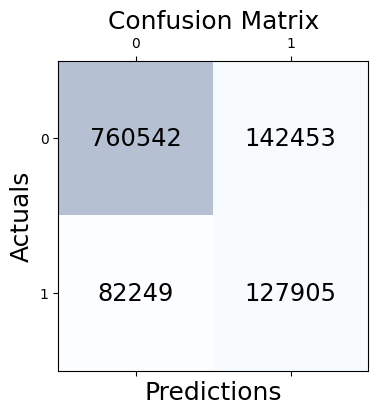

In [8]:
evaluation(y_test_101, y_pred_rf_tuned_rus, rf_tuned_rus, y_pred_prob_rf_tuned_rus, results)

## Final results per model

In [16]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Balanced Accuracy,F1,Recall,Precision
3,XGBClassifier,0.817,0.746,0.547,0.679,0.458
1,RandomForestClassifier,0.795,0.725,0.532,0.609,0.473
2,TabNetClassifier,0.746,0.680,0.449,0.653,0.342
4,LogisticRegression,0.740,0.683,0.481,0.499,0.465


final_result = model_results.groupby('Model').agg({
    'AUROC': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Accuracy': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'F1': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Recall': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Precision': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))]
})

final_result.columns = ['_'.join(col).strip() for col in final_result.columns.values]

final_result.sort_values(by=["AUROC_mean"], ascending=False)

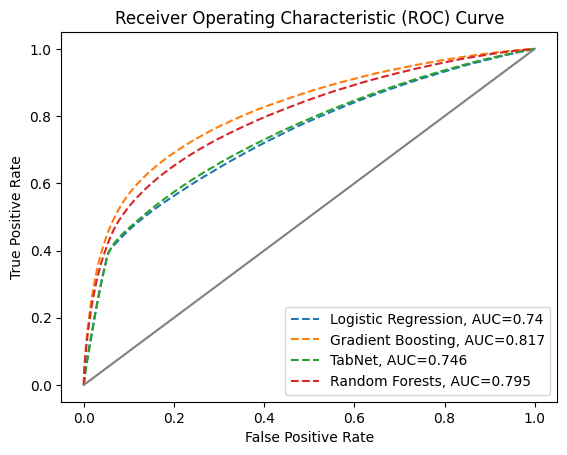

<Figure size 1400x1200 with 0 Axes>

In [17]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_rus, y_pred_prob_xgb_tuned_rus, y_pred_prob_tabnet_tuned_rus, y_pred_prob_rf_tuned_rus)

In [ ]:
complete_confusion_matrix_robust([cm_robust_logreg, cm_robust_xgb, cm_robust_tabnet, cm_robust_rf], ['Logistic Regression', 'XGBoost', 'TabNet', 'Random Forest'])